Notebook to study LJ pT and bound state mass resolution

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
#plotting
import matplotlib.pyplot as plt
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)

<module 'analysis.tools.sidm_processor' from '/home/cms-jovyan/SIDM/analysis/studies/../../analysis/tools/sidm_processor.py'>

Start by looking at default 2mu2e sample with 2mu2e selection, no LJ pT cut, and matched dark photons.

In [2]:
fileset = {
    "2Mu2E_100GeV_1p2GeV_9p6mm": [
        "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root",
    ],
}

In [8]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e_matchedLj",
        "2mu2e_matchedLj_noLjPtCut",
    ],
    ["base_plus_gen"]
)

# test if processor is serializable
import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
hists = output["out"]["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]

Output()

Take a look at ratio of LJ pT to dark photon pT

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9c027f36a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

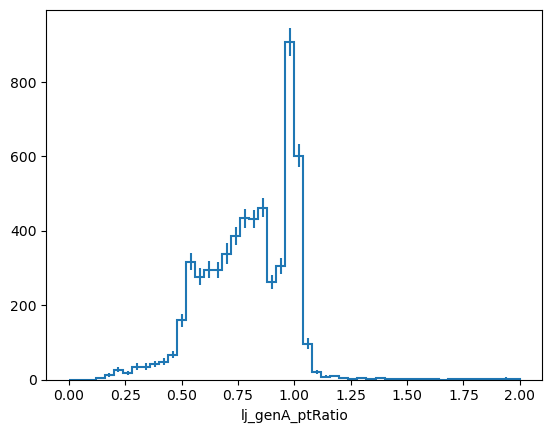

In [15]:
hists["lj_genA_ptRatio_lj_type"]["2mu2e_matchedLj_noLjPtCut", :, :].project("lj_genA_ptRatio").plot1d()

Weird... The peak at 1.0 looks good, and it's skewed to low values like I suspected it might be, but I have no idea where the dip around 0.9 comes from. Ah, I bet the distributions vary by type. Let's see:

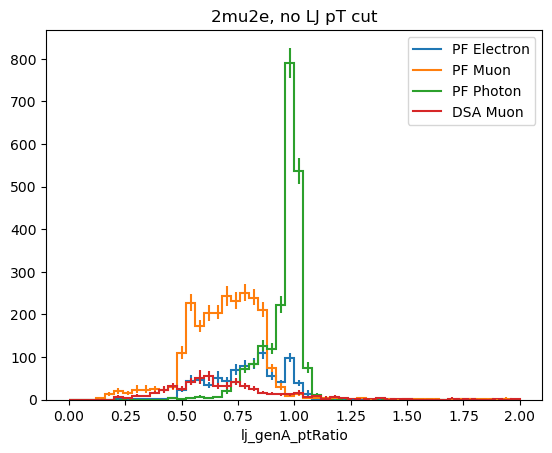

In [16]:
lj_type_names = {
    2: "PF Electron",
    3: "PF Muon",
    4: "PF Photon",
    8: "DSA Muon",
}
hists["lj_genA_ptRatio_lj_type"]["2mu2e_matchedLj_noLjPtCut", :, :].stack("lj_type").plot()
# fixme: figure out how to rebin stack
plt.title("2mu2e, no LJ pT cut")
plt.legend(lj_type_names.values())
plt.show()

Yup, that's pretty clear cut. PF photon LJs have pretty good resolution, though it's skewed towards smaller values, PF muon LJs are systematically low, DSA muon LJs are systematically low and have a quite wide distribution, and PF electron LJs show a blend of the PF photon and PF muon behavior. How about with a 30GeV LJ pT cut imposed?

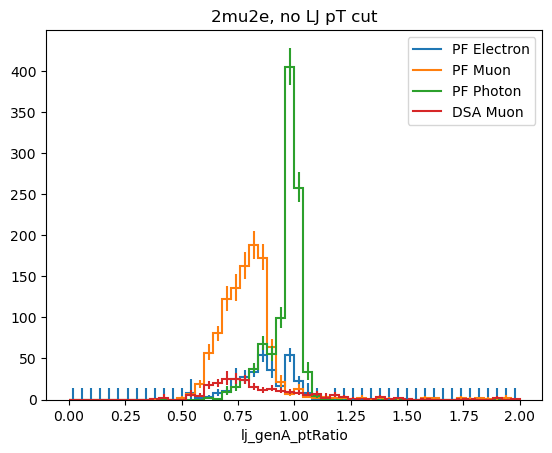

In [17]:
hists["lj_genA_ptRatio_lj_type"]["2mu2e_matchedLj", :, :].stack("lj_type").plot()
# fixme: figure out how to rebin stack
plt.title("2mu2e, no LJ pT cut")
plt.legend(lj_type_names.values())
plt.show()

In [ ]:
No major difference other than cutting out the lowest pT LJs, I think.